#**Project Title: Large-Scale E-commerce Sales Data Analysis with Python**

**Libraries Used**:
1.  Pandas
2.  Matplotlib



In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

### Data Acquisition & Loading

In [3]:
# Downloading the dataset

!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-08-19 18:50:42--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [     <=>            ]  22.62M  24.5MB/s    in 0.9s    

2025-08-19 18:50:44 (24.5 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
# unzipping the dataset

! unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
# Loading the Excel file into a DataFrame with explicit data types

df1 = pd.read_excel('Online Retail.xlsx',dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
df1.shape

(541909, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [8]:
df1[df1.InvoiceNo=='536367']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom
14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047.0,United Kingdom
17,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
18,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom


# **Data Cleaning**

---



## Handling Missing Values

In [9]:
# Identify the over all missing values of the dataset using isnull().sum()

df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:
# Identifying missing descriptions

df1[df1['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [11]:
df1[df1.StockCode=='22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [12]:
df1[df1.StockCode=='22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [13]:
# Getting most frequent description per StockCode using value_counts()

most_freq=df1[['StockCode','Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [14]:
most_freq[most_freq.StockCode=="85123A"]

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3320,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4283,85123A,?,1
4284,85123A,wrongly marked carton 22804,1


In [15]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [16]:
# Finding out the most appropriate single description for a stock code

most_freq=most_freq.groupby('StockCode').head(1)
most_freq.head(5)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [17]:
most_freq[most_freq.StockCode=="85123A"]

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [18]:
# Merging with original DataFrame using .merge()

most_freq.columns=['StockCode','freq_Description','Count']
df2=df1.merge(most_freq,on='StockCode',how='left')
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0


In [19]:
df2[df2.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,Count
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING,1.0
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX,2.0
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom,DOG TOY WITH PINK CROCHET SKIRT,91.0
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom,HOME SWEET HOME KEY HOLDER,114.0
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom,SET OF 4 ROSE BOTANICAL CANDLES,172.0
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,164.0


In [20]:
# Replacing  Description with FrequentDescription to get rid of the missing descriotions

df2['Description']=df2['freq_Description']

df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
Count,112


In [21]:
# Dropping helper columns from the main dataframe using dropna()

df2.dropna(subset=['Description'],inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
Count,0


In [22]:
df2.drop(columns=['freq_Description','Count'],inplace=True)

In [23]:
df2.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


 In our business context for sales transactions we are to put focus on InvoiceNo, Stock Code , Unit price ,Quantity or other columns, while the Customer ID is less needed . Hence in many cases CustomerID is not registered. So, its ok to have null values in CustomerID column.

## Handling Invalid Values

In [24]:
#Looking at the general statistics of the dataframe using describe(), .shape etc. to findout gross inconsistency in any element of the dataframe

df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [25]:
df2[df2.Quantity<0].shape

(10527, 8)

In [26]:
df2[df2.UnitPrice<0].shape

(2, 8)

In [27]:
# Removing negative or zero quantities & prices

df3=df2[(df2['Quantity']>0) & (df2['UnitPrice']>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


We can notice HUGE values in both Quantity and UnitPrice. Let us use quantile to remove those big values (outliers)

Outlier Consideration: Examined extreme Quantity values and retained them based on our business context (e.g., wholesale orders).

In [28]:
 df3.Quantity.quantile(.9999)

np.float64(1439.8763999990188)

For now, we are not going to worry about extreme values because these can be legitimate values

# Feature Engineering : Creating new columns

In [29]:
df3.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
# making a copy of df3 to do feature engineering on it

df4=df3.copy()

Created 2 new columns.
1.   Total sales
2.   Month



In [31]:
#Creating 'Total Sales' column

df4['Total Sales']=df4['Quantity']*df4['UnitPrice']
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [32]:
# Derived the number of month for ''Month' column from invoice date applying Pandas Date time accessor .dt.month on it.

df4['Month']=df4['InvoiceDate'].dt.month
df4.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales,Month
321974,565217,21422,PORCELAIN ROSE SMALL,288,2011-09-01 17:40:00,0.72,13099.0,United Kingdom,207.36,9
446620,574909,21891,TRADITIONAL WOODEN SKIPPING ROPE,1,2011-11-07 15:40:00,1.45,13673.0,United Kingdom,1.45,11
514572,579711,21154,RED RETROSPOT OVEN GLOVE,2,2011-11-30 14:17:00,1.25,15060.0,United Kingdom,2.50,11


#Data Visualization and Insights

##1. Plot Monthly Total Sales Trend

In [33]:
# Calculating monthly sales using groupby() function

monthly_sales=df4.groupby('Month')['Total Sales'].sum()
monthly_sales

,Total Sales
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


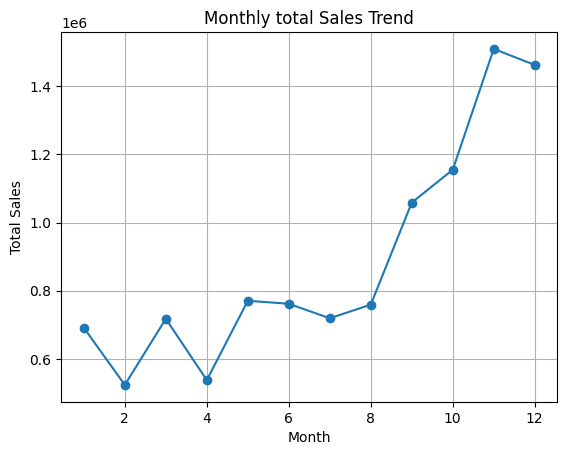

In [34]:
# Plotting  line chart using plot() function

monthly_sales.plot(kind='line',title='Monthly total Sales Trend',marker='o',grid=True)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Insights**

Total sales started rising up in August having a peak in November. This is
likely due to the holiday season at the end of the year

##2. Top 5 countries based on total sales

In [35]:
#Using groupby() countries & then using sort_values() function to get the top 5 country

top_5_country=df4.groupby('Country')['Total Sales'].sum().sort_values(ascending=False).head(5)
top_5_country

,Total Sales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


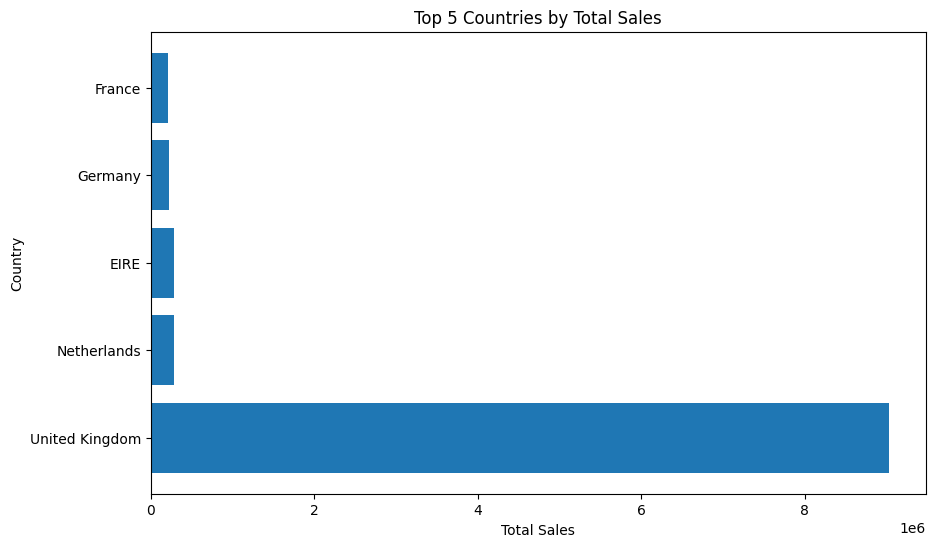

In [36]:
#  plotting horizontal bar chart using barh() for country wise monthly sales for top 5 countries

plt.figure(figsize=(10,6))
plt.barh(top_5_country.index,top_5_country.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.show()


**Insights**

1.  UK has the highest sales (around 9 million)
2.   Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million

**Geographical Sales Dependency:** Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best. Also to break dependancy of sales from a single country we can focus on expanding sales in other countries as well

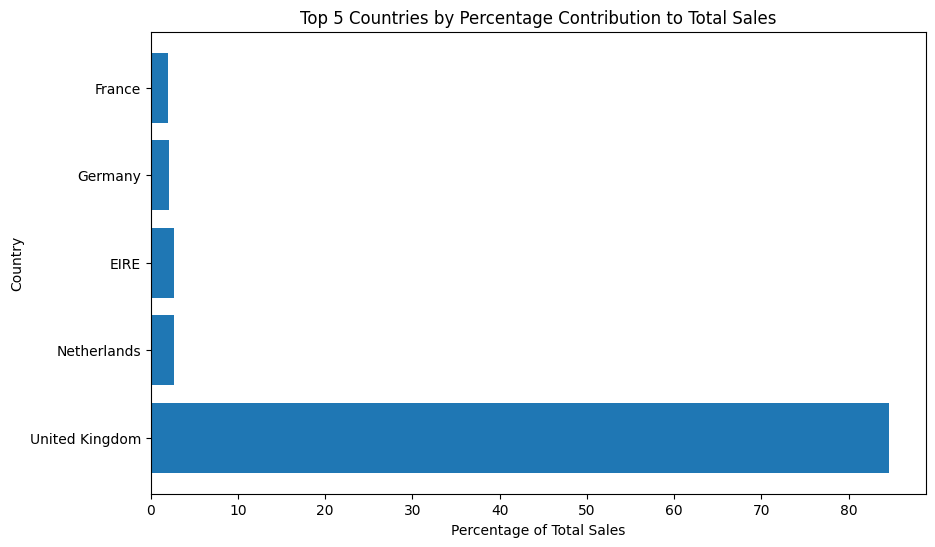

In [37]:
# Calculating percentage contribution of each country to total sales

country_sales=df4.groupby('Country')['Total Sales'].sum()
total_sales=country_sales.sum()
top_5_country=df4.groupby('Country')['Total Sales'].sum().sort_values(ascending=False).head(5)
percentage=(top_5_country/total_sales)*100

# Plotting bar chart to show percentage contribution to total sales by Country
plt.figure(figsize=(10,6))
plt.barh(percentage.index,percentage.values)
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.show()

##3.Top 5 products based on Total sales

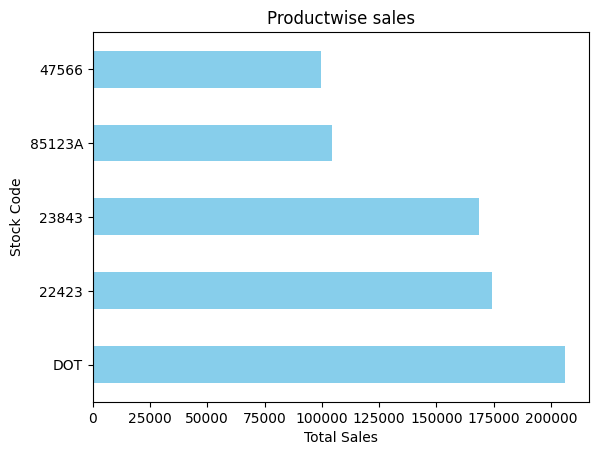

In [38]:
#Finding out Top 5 products based on total sales grouping by 'StockCode' & then using sort_values() function to get the top 5 country
product_wisesales=df4.groupby('StockCode')['Total Sales'].sum()
top_5_products=df4.groupby('StockCode')['Total Sales'].sum().sort_values(ascending=False).head(5)

#Plottin horizontal Bar chart to show top 5 products based on Total sales
top_5_products.plot(kind='barh',color='skyblue')
plt.xlabel("Total Sales")
plt.ylabel("Stock Code")
plt.title("Productwise sales")
plt.show()

In [39]:
product_wisesales.sum()

np.float64(10666684.544)

In [40]:
df4[df4.StockCode=='DOT'].Description.iloc[0]

'DOTCOM POSTAGE'

In [41]:
#Printing the description of the top 5 products using foor loop & f""

for stock_code in top_5_products.index:
  description=df4[df4.StockCode==stock_code].Description.iloc[0]
  print(f"{stock_code}==>{description}")

DOT==>DOTCOM POSTAGE
22423==>REGENCY CAKESTAND 3 TIER
23843==>PAPER CRAFT , LITTLE BIRDIE
85123A==>WHITE HANGING HEART T-LIGHT HOLDER
47566==>PARTY BUNTING


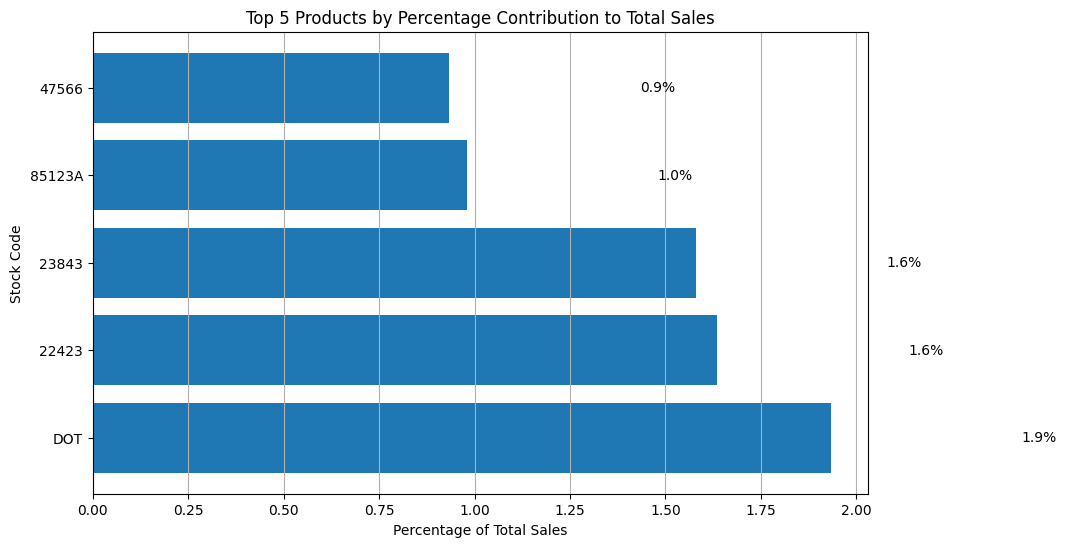

In [42]:
# Calculating percentage contribution of each of the top 5 products to total sales
total_sales=product_wisesales.sum()
percentages=(top_5_products/total_sales)*100

#Plottin Bar chart to show  top 5 products by Percentage of contribution to total Sales
plt.figure(figsize=(10,6))
bars=plt.barh(percentages.index,percentages.values)
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')


# Adding percentage labels to the bars

for bar,percentage in zip(bars,percentages):
  plt.text(bar.get_width()+0.5,bar.get_y()+bar.get_height()/2,f'{percentage:.1f}%',va='center')


plt.show()

**Insights**

1. **Product Sales Diversification:** Product sales were well diversified, with the **top-selling item** contributing **only about 2%** of total sales, indicating no over-reliance on a single product

#4. RFM Analysis (Recency, Frequency, Monetary)

In [43]:
#max invoice date using max() function

df4.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

#Calculating Recency, Frequency, and Monetary values per customer.

In [44]:
# Defining current date as one day after max invoice date while using Timedelta() class
current_date=df4['InvoiceDate'].max() + pd.Timedelta(days=1)


#Calculating Recency, Frequency, and Monetary values per customer using agga(),lamda x() & groupby() function
rfm=df4.groupby('CustomerID').agg({'InvoiceDate':lambda x:(current_date - x.max()).days,
                                   'InvoiceNo': 'count',
                                   'Total Sales': 'sum'})
rfm.columns=['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [45]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


##Segmenting customers based on RFM


In [46]:

rfm['R_Segment']=pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])
rfm['F_Segment']=pd.qcut(rfm['Frequency'],4,labels=[1,2,3,4])
rfm['M_Segment']=pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4])
rfm['RFM_Score']=rfm[['R_Segment','F_Segment','M_Segment']].sum(axis=1)

rfm.sample(5)



,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
14234.0,22,159,775.46,3,4,3,10
16140.0,66,35,725.18,2,2,3,7
18203.0,157,19,160.42,1,2,1,4
17612.0,53,135,2048.45,2,4,4,10
13704.0,5,134,2308.06,4,4,4,12


##Customers with highest RFM Score

In [47]:

rfm.sort_values('RFM_Score',ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18283.0,4,756,2094.88,4,4,4,12
18245.0,7,175,2567.06,4,4,4,12
18241.0,10,104,2073.09,4,4,4,12
18229.0,12,164,7276.90,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
...,...,...,...,...,...,...,...
16471.0,275,13,223.95,1,1,1,3
18224.0,264,10,158.95,1,1,1,3
18220.0,227,2,305.28,1,1,1,3


Insights:



1. Customers segmented by Recency, Frequency, and Monetary (RFM) scores reveal
valuable *"**Gold** customers"* with **highest RFM score of 12**, who contribute significantly to revenue.   




#5. Customer Churn Analysis

In [48]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [49]:
# creating a basket matrix for association rule mining

customer_last_purchase=df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [50]:
type(customer_last_purchase)

pandas.core.series.Series

In [51]:
current_date

Timestamp('2011-12-10 12:50:00')

In [52]:
#Calculating the number of days when a customer purchased for the last time from the company

customer_last_purchase=(current_date-customer_last_purchase).dt.days
customer_last_purchase.head(4)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19


In [53]:
# defining churn thresh hold (90 days without any purchase)

churn_thresh_hold= 90
churned_customers=customer_last_purchase[customer_last_purchase>churn_thresh_hold]
churned_customers.head(4)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232


Number of Churned Customers:  1449


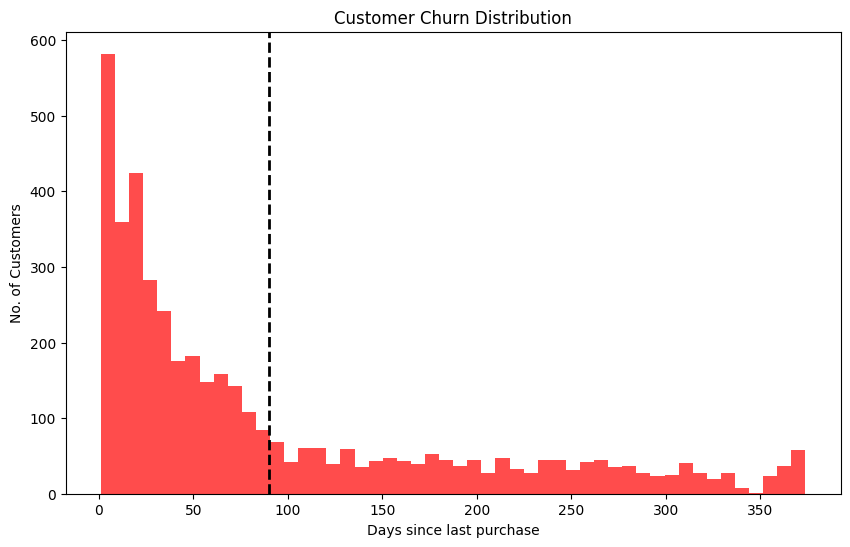

In [54]:
#Getting the total number of churned customers
print("Number of Churned Customers: ",len(churned_customers))

# Plotting churn distribution histogram
plt.figure(figsize=(10,6))
plt.hist(customer_last_purchase,bins=50,color='red',alpha=0.7)
plt.axvline(churn_thresh_hold,color='black',linestyle='dashed',linewidth=2)
plt.title("Customer Churn Distribution")
plt.xlabel('Days since last purchase')
plt.ylabel('No. of Customers')
plt.show()

Insights:

1. Number of Churned Customers: **1449**